In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Data_raw = pd.ExcelFile('C:/Users/PC/Desktop/Data_raw.xlsx')
Data = Data_raw.parse('data_m')
numData = Data.shape[0]
Data

,Date,K200,CD3m,CD1m,Call1d
0,1990-01-31,97.83,15.00,14.000,13.00
1,1990-02-28,94.06,15.00,14.000,13.00
2,1990-03-31,92.10,15.00,14.000,13.00
3,1990-04-30,74.93,15.00,14.000,13.00
4,1990-05-31,87.67,15.00,14.000,13.00
5,1990-06-30,78.05,15.00,14.000,13.00
6,1990-07-31,75.17,15.00,14.000,13.00
7,1990-08-31,66.76,15.00,14.000,13.00
8,1990-09-29,66.88,15.00,14.000,13.00
9,1990-10-31,76.32,15.00,14.000,13.00


In [3]:
Dates = Data.iloc[:,0].copy()
Risky = Data.iloc[:,1].copy()
Rf = Data.iloc[:,3].copy()

In [4]:
MomTau = list(range(1,13))  # 1월 말 ~ 12월 말 index
numMomTau = len(MomTau)
Mom = np.zeros([numData,numMomTau])    ## [353,12]

In [5]:
i=0
for t in MomTau:
    Mom[:,i] = (Risky/Risky.shift(t)-1)*100
    i+=1
Mom

array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [ -3.85362363,          nan,          nan, ...,          nan,
                 nan,          nan],
       [ -2.08377631,  -5.85709905,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [ -2.57928118,  -3.29147574,   5.53477365, ..., -11.07680432,
        -14.5506243 , -12.11976733],
       [  3.05266204,   0.39464412,  -0.33929134, ...,  -4.9189081 ,
         -8.36227969, -11.94214365],
       [ -4.81889653,  -1.91333912,  -4.44326991, ...,  -8.82837452,
         -9.50076754, -12.77820661]])

In [6]:
Signal = 1*(Mom>0)
w1 = Signal      #위험자산 비중
w2 = 1 - w1      #무위험자산 비중

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [7]:
R1 = (Risky/Risky.shift(1)-1)*100
R2 = Rf/12
Rp = np.zeros([numData,numMomTau])  

In [8]:
for t in range(1, numData):
    Rp[t,:] = w1[t-1,:]*R1[t] + w2[t-1,:]*R2[t]
Rp

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16666667,  1.16666667,  1.16666667, ...,  1.16666667,
         1.16666667,  1.16666667],
       [ 1.16666667,  1.16666667,  1.16666667, ...,  1.16666667,
         1.16666667,  1.16666667],
       ...,
       [ 0.15458333, -2.57928118, -2.57928118, ...,  0.15458333,
         0.15458333,  0.15458333],
       [ 0.15125   ,  0.15125   ,  3.05266204, ...,  0.15125   ,
         0.15125   ,  0.15125   ],
       [-4.81889653, -4.81889653,  0.14958333, ...,  0.14958333,
         0.14958333,  0.14958333]])

In [9]:
chDateNum = 19941228
chDate = pd.to_datetime(str(chDateNum),format='%Y%m%d')
idx = np.argmin(np.abs(Dates - chDate))

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


In [10]:
Dates_invest = Dates.iloc[idx:].copy().reset_index(drop=True)
Rp_invest = Rp[idx:,:].copy()
Vp_invest = np.ones([numData-idx, numMomTau])*100      ## [294,12]
for t in range(1,numData-idx):
    Vp_invest[t,:] = Vp_invest[t-1,:]*(1+Rp_invest[t,:]/100)

In [11]:
Risky_invest = (Risky.iloc[idx:numData].copy()/Risky[idx])*100

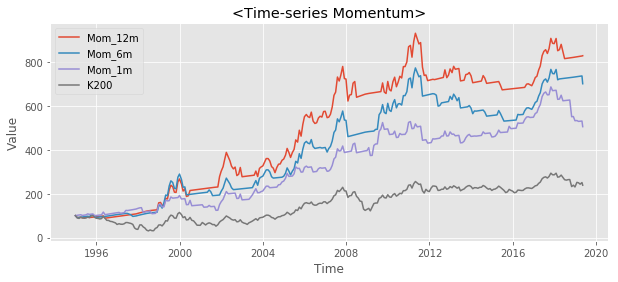

In [12]:
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
plt.plot(Dates_invest, Vp_invest[:,11], label='Mom_12m')
plt.plot(Dates_invest, Vp_invest[:,5], label='Mom_6m')
plt.plot(Dates_invest, Vp_invest[:,0], label='Mom_1m')
plt.plot(Dates_invest, Risky_invest, label='K200')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('<Time-series Momentum>')
plt.legend()
plt.show()